In [232]:
# Observations

#1.Urban cities have the highest number of rides representing 68% of the total rides for the three city types.
#  They have majority of the lowest average fare representing as inversely proportional relationship between the number
#  of rides and the average fare. 

#2.The average fare in rural cities is high as compared to the number of rides, representing an inverse proprtion betweeen
#  the number of rides and the average fare.

#3.Suburban cities are in the middle except for an outlier(Port James), where the number of rides are the highest of the 
#  three city types, but the average fare is in between the highest the lowest average fare of suburban cities.

In [233]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
city_path = os.path.join("Pyber", "raw_data", "city_data.csv")
ride_path = os.path.join("Pyber", "raw_data", "ride_data.csv")

In [235]:
city_data_df= pd.read_csv(city_path)
ride_data_df= pd.read_csv(ride_path)

In [236]:
combined_df = pd.merge(ride_data_df, city_data_df, on="city", how="outer")
combined_df = combined_df.set_index("city")

In [237]:
urban_df = combined_df[combined_df["type"]=="Urban"]
udrivercount = urban_df.groupby("city")["driver_count"].mean()
uavg_fare = round(urban_df.groupby("city")["fare"].mean())
urides_per_city = urban_df.groupby("city")["ride_id"].count()

In [238]:
suburban_df = combined_df[combined_df["type"]=="Suburban"]
sdrivercount = suburban_df.groupby("city")["driver_count"].size()
savg_fare = round(suburban_df.groupby("city")["fare"].mean())
srides_per_city = suburban_df.groupby("city")["ride_id"].count()

In [239]:
rural_df = combined_df[combined_df["type"]=="Rural"]
rdrivercount = rural_df.groupby("city")["driver_count"].size()
ravg_fare = round(rural_df.groupby("city")["fare"].mean())
rrides_per_city = rural_df.groupby("city")["ride_id"].count()

In [240]:
plt.figure(figsize=(10,6))
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(color="white", linestyle="solid")
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

Text(0,0.5,'Average Fare($)')

In [241]:
urban_handle = plt.scatter(urides_per_city, uavg_fare, s=udrivercount*10, facecolors= "lightcoral", edgecolors="black",
                           alpha=0.75, linewidth=1, label="Urban")
suburban_handle = plt.scatter(srides_per_city, savg_fare, s=sdrivercount*10, facecolors= "lightskyblue", edgecolors="black",
                              alpha=0.75, linewidth=1, label="Suburban")
rural_handle = plt.scatter(rrides_per_city, ravg_fare, s=rdrivercount*10, facecolors= "yellow", edgecolors="black",
                           alpha=0.75, linewidth=1, label="Rural")


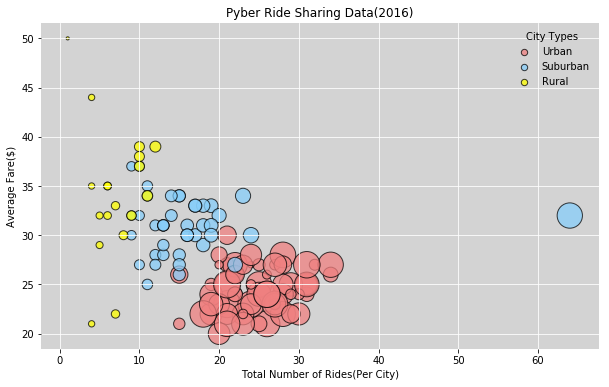

In [242]:
lgnd= plt.legend(handles=[urban_handle, suburban_handle, rural_handle], loc="upper right", title='City Types', frameon=False)
for handle in lgnd.legendHandles:
    handle.set_sizes([40])
plt.show()

In [243]:
#total fares by city type
city_fare = combined_df.groupby("type")["fare"].sum()
total_city_fare = combined_df["fare"].sum()
percent_fare = city_fare/total_city_fare * 100

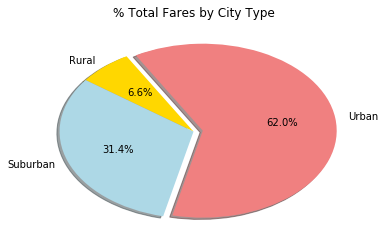

In [244]:
labels = ["Rural", "Suburban", "Urban"]
fares = [percent_fare[0], percent_fare[1], percent_fare[2]]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0,0,0.07)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% Total Fares by City Type")
plt.show()

In [245]:
#total rides by city type
city_ride = combined_df.groupby("type")["ride_id"].count()
total_rides = combined_df["ride_id"].count()
percent_rides = city_ride/total_rides * 100

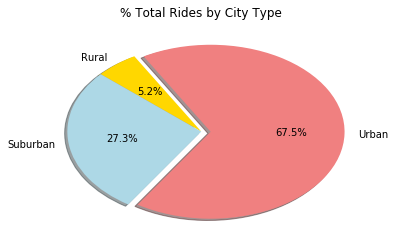

In [246]:
labels = ["Rural", "Suburban", "Urban"]
rides = [percent_rides[0], percent_rides[1], percent_rides[2]]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0, 0.07)
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% Total Rides by City Type")
plt.show()

In [247]:
#total drivers by city type
city_driver = combined_df.groupby("type")["driver_count"].count()
total_drivers = combined_df["driver_count"].count()
percent_drivers = city_driver/total_drivers*100

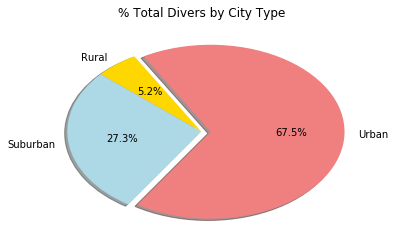

In [248]:
labels = ["Rural", "Suburban", "Urban"]
drivers = [percent_drivers[0], percent_drivers[1], percent_drivers[2]]
colors = ["gold", "lightblue", "lightcoral"]
explode = ((0,0,0.07))
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% Total Divers by City Type")
plt.show()